In [121]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [122]:
import sys                                               ## 파이썬 엔진에 대한 정보를 관리하는 모듈을 사용한다. 
from matplotlib import font_manager, rc                  ## 폰트를 관리하는 함수와 설정 함수를 사용한다. 

if sys.platform  == 'darwin':                             ## MAC OS의 이름을 확인한다.
    path = '.....'  
elif sys.platform == 'win32':                             ## Windows 이름을 확인한다.
    path = "font/malgun.ttf"
else:
    print('Unknown system... sorry~~~~') 
    
font_name = font_manager.FontProperties(fname=path).get_name()        ##  폰트가 있는지를 확인한다. 
rc('font', family=font_name)                                          ## 한글 폰트를 시각화 환경에 세팅한다. 
plt.rcParams['axes.unicode_minus'] = False 

In [123]:
data = pd.read_csv("data/price/오피스텔매매가격.csv", encoding = "CP949")
data1 = data[['2019.01', '2019.07', '2020.01']]
data1 = data1.iloc[1]
data1 = pd.DataFrame(data1)
data1.index = ["2019년 01월", "2019년 07월", "2020년 01월"]
data1.columns = ["전국"]
data1 = data1.T
data1

,2019년 01월,2019년 07월,2020년 01월
전국,178554,177594,178372


In [124]:
data2 = pd.read_excel("data/price/오피스텔_매매가격.xlsx", header = 10, index_col = "지 역")
data3 = data2[["2020년 07월", "2021년 01월", "2021년 07월", "2022년 01월"]]
data3 = data3.loc[["전국"]]

In [125]:
op = data1.join(data3).iloc[0]
op = op.astype("int64")
op

2019년 01월    178554
2019년 07월    177594
2020년 01월    178372
2020년 07월    203454
2021년 01월    204880
2021년 07월    208505
2022년 01월    216076
Name: 전국, dtype: int64

In [126]:
data4 = pd.read_excel("data/price/평균매매가격_단독.xlsx", header = 10, index_col = "지 역")
data5 = data4[["2019년 01월", "2019년 07월", "2020년 01월", "2020년 07월", "2021년 01월", "2021년 07월", "2022년 01월"]]
solo = data5.loc[["전국"]].iloc[0]
display(solo)

data4 = pd.read_excel("data/price/평균매매가격_아파트.xlsx", header = 10, index_col = "지 역")
data5 = data4[["2019년 01월", "2019년 07월", "2020년 01월", "2020년 07월", "2021년 01월", "2021년 07월", "2022년 01월"]]
apt = data5.loc[["전국"]].iloc[0]
display(apt)

data4 = pd.read_excel("data/price/평균매매가격_연립다세대.xlsx", header = 10, index_col = "지 역")
data5 = data4[["2019년 01월", "2019년 07월", "2020년 01월", "2020년 07월", "2021년 01월", "2021년 07월", "2022년 01월"]]
many = data5.loc[["전국"]].iloc[0]
display(many)

display(op)

2019년 01월    285494
2019년 07월    289623
2020년 01월    293328
2020년 07월    298014
2021년 01월    302889
2021년 07월    344759
2022년 01월    351144
Name: 전국, dtype: int64

2019년 01월    349426
2019년 07월    344195
2020년 01월    366793
2020년 07월    380260
2021년 01월    401083
2021년 07월    491728
2022년 01월    514577
Name: 전국, dtype: object

2019년 01월    165762
2019년 07월    164795
2020년 01월    168514
2020년 07월    169424
2021년 01월    171690
2021년 07월    202140
2022년 01월    206397
Name: 전국, dtype: int64

2019년 01월    178554
2019년 07월    177594
2020년 01월    178372
2020년 07월    203454
2021년 01월    204880
2021년 07월    208505
2022년 01월    216076
Name: 전국, dtype: int64

In [127]:
# 데이터 합치기
df = pd.concat([solo, apt, many, op], axis=1)
df = df.T
df.index = ['단독', '아파트', '연립다세대', '오피스텔']
df

,2019년 01월,2019년 07월,2020년 01월,2020년 07월,2021년 01월,2021년 07월,2022년 01월
단독,285494,289623,293328,298014,302889,344759,351144
아파트,349426,344195,366793,380260,401083,491728,514577
연립다세대,165762,164795,168514,169424,171690,202140,206397
오피스텔,178554,177594,178372,203454,204880,208505,216076


<AxesSubplot:>

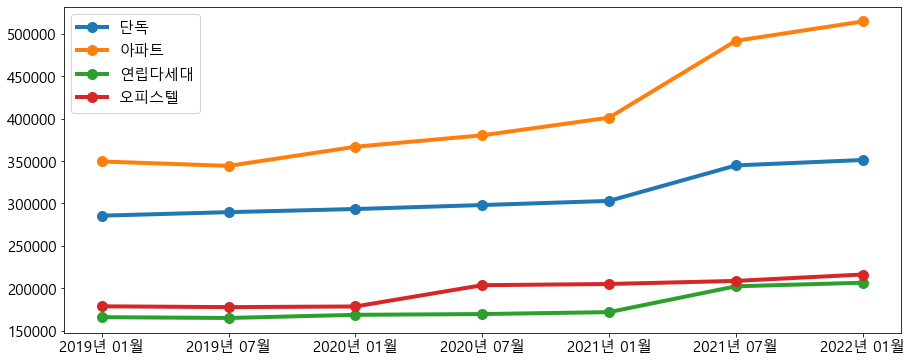

In [128]:
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (15, 6)

df.T.plot(linewidth=4, marker='o', markersize=10)